<a href="https://colab.research.google.com/github/marcosscofano/puc-rio_mvp_analise_dados/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(Marcos_Scofano_4052025000585).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Marcos Pasquale Vieira Scofano

**Matrícula:** 4052025000585

**Dataset:** [Medical Appointment No Shows](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

# Descrição do Problema

O conjunto de dados de faltas (*no show*) em consultas médicas (*medical appointments*) consiste em marcações realizadas no SUS, ou seja, no Brasil* no mês/ano de Maio/2016. O objetivo principal é apresentar os dados do agendamento, do paciente e do indicador se houve comparecimento (ou não) à consulta.

⚠️ **Obs.:** no dataset há uma coluna com o bairro (*neighborhood*). Pelos valores apresentados, é possível inferir que os dados levantados se referem à cidade de Vitória, capital do estado do Espírito Santo (ES).

## Hipóteses do Problema

As seguintes hipóteses podem ser elencadas:

- O tempo de espera entre a marcação e a consulta afeta a presença dos pacientes?

- As características médicas dos pacientes, como hipertensão, diabetes ou alcoolismo, têm impacto na chance de comparecimento às consultas?

- Fatores como idade, gênero e local de moradia afetam a presença dos pacientes nas consultas?

## Tipo de Problema

Este é um problema de **classificação binária supervisionada**. O objetivo é prever se um paciente vai faltar ou não à consulta médica, com base em informações prévias como idade, gênero, bairro, presença de doenças crônicas, recebimento de SMS, entre outros. O atributo alvo (target) é a variável **No-show**, que originalmente assume dois valores possíveis:

  - `No` → compareceu à consulta;
  - `Yes` → faltou à consulta.

## Seleção de Dados

O dataset de consultas médicas do SUS foi encontrado no site do Kaggle, sendo este uma plataforma online amplamente conhecida e voltada para ciência de dados e aprendizado de máquina. O Kaggle, entre outras funcionalidades, oferece um grande repositório de conjuntos de dados prontos para análise e modelagem.

| **Variável**     | **Selecionar?** | **Justificativa**                                                                 |
| ---------------- | --------------- | --------------------------------------------------------------------------------- |
| `PatientId`      | ❌ Não           | Identificador único do paciente. Não possui valor preditivo.                      |
| `AppointmentID`  | ❌ Não           | Apenas identificador da consulta. Sem utilidade para análise ou modelagem.        |
| `Gender`         | ✅ Sim           | Pode influenciar o comportamento de comparecimento.                               |
| `ScheduledDay`   | ✅ Sim           | Permite calcular o tempo de espera (diferença entre agendamento e consulta).      |
| `AppointmentDay` | ✅ Sim           | Usada junto a `ScheduledDay` para calcular variáveis derivadas.                   |
| `Age`            | ✅ Sim           | A idade pode influenciar o comparecimento ou ausência.                            |
| `Neighbourhood`  | ✅ Sim           | Pode representar fatores socioeconômicos ou acesso à saúde.                       |
| `Scholarship`    | ✅ Sim           | Indicador social relevante que pode afetar o comportamento de saúde.              |
| `Hipertension`   | ✅ Sim           | Comorbidade potencialmente associada a maior comprometimento com consultas.       |
| `Diabetes`       | ✅ Sim           | Relevante como condição crônica, pode influenciar o engajamento com o tratamento. |
| `Alcoholism`     | ✅ Sim           | Pode estar associado a comportamentos de risco e faltas.                          |
| `Handcap`        | ✅ Sim           | Indica limitações físicas que podem influenciar o comparecimento.                 |
| `SMS_received`   | ✅ Sim           | Relacionado diretamente à comunicação e possível engajamento do paciente.         |
| `No-show`        | ✅ Sim (alvo)    | Variável-alvo da análise preditiva (target).                                      |



## Atributos do Dataset

O dataset contém **110.527** amostras,com os seguintes atributos:

| Nome do Atributo | Tipo       | Descrição                                                                      |
| ---------------- | ---------- | ------------------------------------------------------------------------------ |
| `PatientId`      | Numérico   | Identificador do paciente (pode se repetir para pacientes diferentes)          |
| `AppointmentID`  | Numérico   | Identificador único da consulta                                                |
| `Gender`         | Categórico | Sexo do paciente (`F` ou `M`)                                                  |
| `ScheduledDay`   | Data/hora  | Data e hora em que a consulta foi marcada                                      |
| `AppointmentDay` | Data/hora  | Data e hora da consulta propriamente dita                                                       |
| `Age`            | Numérico   | Idade do paciente                                                              |
| `Neighbourhood`  | Categórico | Bairro onde o paciente mora                                                    |
| `Scholarship`    | Binário    | 1 se o paciente participa de programa social (Bolsa Família), 0 caso contrário |
| `Hipertension`   | Binário    | 1 se o paciente tem hipertensão, 0 caso contrário                              |
| `Diabetes`       | Binário    | 1 se o paciente tem diabetes, 0 caso contrário                                 |
| `Alcoholism`     | Binário    | 1 se o paciente é alcoólatra, 0 caso contrário                                 |
| `Handcap`        | Binário    | 0 (sem deficiência) a 4 (níveis de deficiência)                                |
| `SMS_received`   | Binário    | 1 se o paciente recebeu SMS de lembrete, 0 caso contrário                      |
| `No-show`        | Categórico | `Yes` se o paciente faltou à consulta, `No` se compareceu                      |


Resumo:


| Aspecto                  | Valor                                                 |
| ------------------------ | ----------------------------------------------------- |
| Atributo alvo (`target`) 🎯| `No-show`                                             |
| Classes possíveis        | `Yes` (faltou), `No` (compareceu)                     |
| Objetivo do modelo       | Prever a probabilidade de falta com base nos demais atributos |

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [1]:
import pandas as pd
import os
import kagglehub
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

df = None
# Buscando dados diretamente do repositório do GitHub criado para o MVP
try:
  print("Buscando arquivo csv do GitHub 🔍...")
  # Fazendo a leitura para um dataframe Pandas
  df = pd.read_csv("https://raw.githubusercontent.com/marcosscofano/puc-rio_mvp_analise_dados/refs/heads/main/KaggleV2-May-2016.csv")
  print("Arquivo carregado 👍🏻!")
except Exception as ex:
  #Em caso de alguma impossibilidade de carga via GitHub, o algoritmo tenta carregar o dataset direto do repositório do Kaggle
  print("⚠️ Não foi possível baixar o arquivo do repositório. Motivo:",ex)
  print("Tentando diretamente do repositório do Kaggle 🔍...")
  try:
    path = kagglehub.dataset_download("joniarroba/noshowappointments")
    print("Caminho para o arquivo 📂:", path)
    # Montando o caminho completo até o arquivo CSV
    csv_path = os.path.join(path, "KaggleV2-May-2016.csv")
    # Fazendo a leitura para um dataframe Pandas
    df = pd.read_csv(csv_path)
    print("Arquivo carregado 👍🏻!")
  except Exception as ex:
    print("⚠️ Não foi possível baixar o arquivo do repositório. Motivo:",ex)

#Salvando o dataframe original
dfOriginal = df.copy()

if not df.empty:
  print("\nPrimeiras 10 linhas 🔍:")
  print(tabulate(df.head(10), headers='keys', tablefmt='plain'))

Buscando arquivo csv do GitHub 🔍...
Arquivo carregado 👍🏻!

Primeiras 10 linhas 🔍:
      PatientId    AppointmentID  Gender    ScheduledDay          AppointmentDay          Age  Neighbourhood        Scholarship    Hipertension    Diabetes    Alcoholism    Handcap    SMS_received  No-show
 0  2.98725e+13          5642903  F         2016-04-29T18:38:08Z  2016-04-29T00:00:00Z     62  JARDIM DA PENHA                0               1           0             0          0               0  No
 1  5.58998e+14          5642503  M         2016-04-29T16:08:27Z  2016-04-29T00:00:00Z     56  JARDIM DA PENHA                0               0           0             0          0               0  No
 2  4.26296e+12          5642549  F         2016-04-29T16:19:04Z  2016-04-29T00:00:00Z     62  MATA DA PRAIA                  0               0           0             0          0               0  No
 3  8.67951e+11          5642828  F         2016-04-29T17:29:31Z  2016-04-29T00:00:00Z      8  PONTAL DE CAMB

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Resumo estatístico dos atributos com valor numérico

A única variável numérica a ser considerada é *Age*. Segue abaixo seu resumo estatístico:

In [2]:
print("Resumo Estatítico:")
print(df['Age'].describe())

print("\nVerificando linhas com idade negativa:")
df[df['Age'] < 0].head(5)

Resumo Estatítico:
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Verificando linhas com idade negativa:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


🧠 **Insights:** a variável *Age* que representa a idade dos pacientes possui características estatísticas dentro do esperado, exceto o valor mínimo -1. Conforme visto acima, há uma única instância com essa situação. Verificando nos comentários do *dataset* no Kaggle, o autor informou que trata-se de consulta a um bebê ainda não nascido, ou seja, para a gestante. Na etapa de pré processamento do dados será decidido se a linha será retirada ou se colocaremos a idade igual a zero para essa instância.

## Total e Tipo das Instâncias

Conforme dito anteriormente, o dataset possui **110.557** instâncias (observações). Os tipos de dados estão elencadas no código abaixo:

In [3]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 110527

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


## Análise de Variáveis Faltantes, Valores Distintos e Máximos/Mínimos (intervalos)

O objetivo dessa análise é verificar quais variáveis possuem registros faltantes e quais são

In [4]:

for coluna in df.columns:
    n_faltantes = df[coluna].isnull().sum()
    n_distintos = df[coluna].nunique()#.sort_values(ascending=False)

    print(f"🔹 Coluna: {coluna}")
    print(f"   ‼️{n_distintos} valores distintos.")
    if n_faltantes == 0:
        print("   ✔️ Nenhum valor faltante.")
    else:
        print(f"   ⚠️ {n_faltantes} valor(es) faltante(s).")

    # Tenta mostrar valores mínimo e máximo, se for possível
    try:
        minimo = df[coluna].min()
        maximo = df[coluna].max()

        print(f"   📉 Mínimo: {minimo}")
        print(f"   📈 Máximo: {maximo}")
    except:
        print("   ⚠️ Não foi possível calcular mínimo e máximo.")

    print("-" * 50)

🔹 Coluna: PatientId
   ‼️62299 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo: 39217.84439
   📈 Máximo: 999981631772427.0
--------------------------------------------------
🔹 Coluna: AppointmentID
   ‼️110527 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo: 5030230
   📈 Máximo: 5790484
--------------------------------------------------
🔹 Coluna: Gender
   ‼️2 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo: F
   📈 Máximo: M
--------------------------------------------------
🔹 Coluna: ScheduledDay
   ‼️103549 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo: 2015-11-10T07:13:56Z
   📈 Máximo: 2016-06-08T20:07:23Z
--------------------------------------------------
🔹 Coluna: AppointmentDay
   ‼️27 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo: 2016-04-29T00:00:00Z
   📈 Máximo: 2016-06-08T00:00:00Z
--------------------------------------------------
🔹 Coluna: Age
   ‼️104 valores distintos.
   ✔️ Nenhum valor faltante.
   📉 Mínimo

🧠 **Insights:** seguem as percepções obtidas com a execução do código acima:
 - O dataset **não possui registros faltantes** em todas as variáveis;
 - As colunas *Scholarship*, *Hipertension*, *Diabetes*, *Alcoholism* e *SMS_received* são variáveis booleanas representadas como números inteiros (0 - *False* e 1 - *True*);
 - Conforme já informado, a variável *Age* possui valores não esperados (-1) e deverá receber um tratamento de dados;
 - A coluna *No-show* poderia ser representada da mesma forma que as demais variáveis booleanas, entretanto está representada como uma variável categórica, assumindo os valores "No" para *False* e "Yes" para *True*. Portanto, deverá sofrer o tratamento adequado;
 - As variáveis de data *ScheduledDay* e *AppointmentDay* possuem valores adequados. É importante perceber que apenas *ScheduledDay* possui informação de hora;
 - A variável *Handcap* possui apenas os valores dentro do intervalo esperado (0-4), ou seja, 5 valores diferentes possíveis.


## Distribuição entre comparecimentos e não comparecimentos

O objetivo dessa análise é simplesmente verificar, para a totalidade do dataset, a quantidade e a proporção de registros de comparecimentos e não comparecimentos.

⚠️ Lembre-se com o valor "Yes" indica um não comparecimento à consulta.

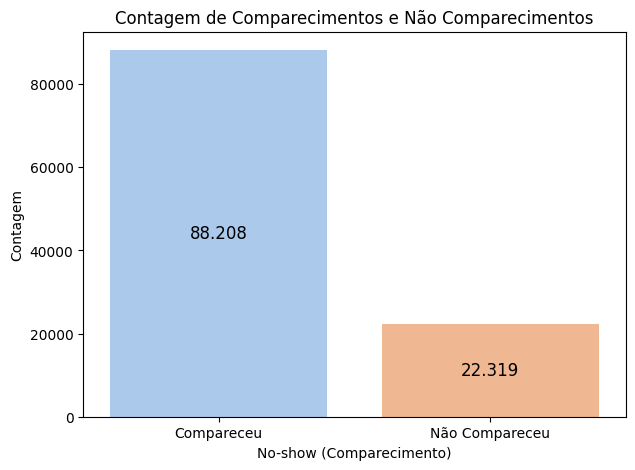

In [5]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='No-show', hue='No-show', data=df, palette='pastel', legend=False)

# Define os ticks manualmente e depois os labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Compareceu', 'Não Compareceu'])

# Adiciona os valores dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}'.replace(",", "."),
                (p.get_x() + p.get_width() / 2, height / 2),
                ha='center', va='center', fontsize=12, color='black')

# Labels de título e dos eixos
plt.title('Contagem de Comparecimentos e Não Comparecimentos')
plt.xlabel('No-show (Comparecimento)')
plt.ylabel('Contagem')
plt.show()

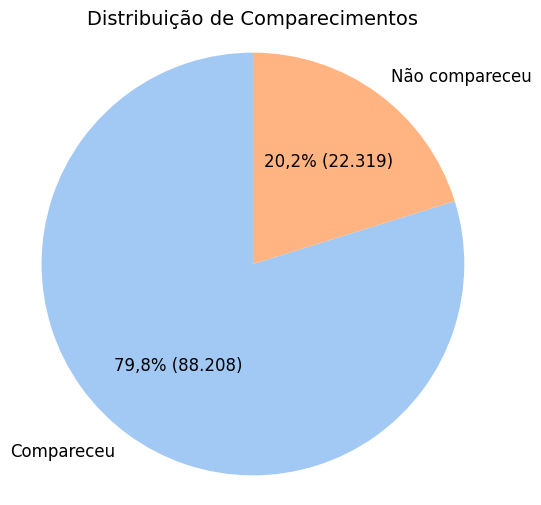

In [6]:
# Contagem dos valores da variável alvo
counts = df['No-show'].value_counts()
labels = ['Compareceu', 'Não compareceu']
colors = sns.color_palette("pastel")[0:2]
total = sum(counts.values)

# Função personalizada: percentual com vírgula + valor absoluto formatado
def format_label(pct, allvals):
    absolute = int(round(pct/100 * total))
    return f'{pct:.1f}'.replace('.', ',') + f'% ({absolute:,.0f})'.replace(',', '.')

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(counts.values,
        labels=labels,
        colors=colors,
        startangle=90,
        autopct=lambda pct: format_label(pct, counts.values),
        textprops={'fontsize': 12})
plt.title('Distribuição de Comparecimentos', fontsize=14)
plt.axis('equal')
plt.show()

🧠 **Insight:** como é possível observar nos gráficos anteriores, o dataset apresenta que aproximadamente em 20% das consultas marcadas não há comparecimento do paciente. Pela natureza do cenário, era esperado que o dataset fosse desbalanceado quanto à variável categórica "No-Show", sendo esta também nosso atributo alvo para a posterior criação do modelo de *Machine learning*.

## Distribuição entre gêneros

O objetivo dessa análise é verificar o balanceamento do dataset quanto à quantidade de registros por gênero, assim como verificar o comparecimento por essa variável categórica.

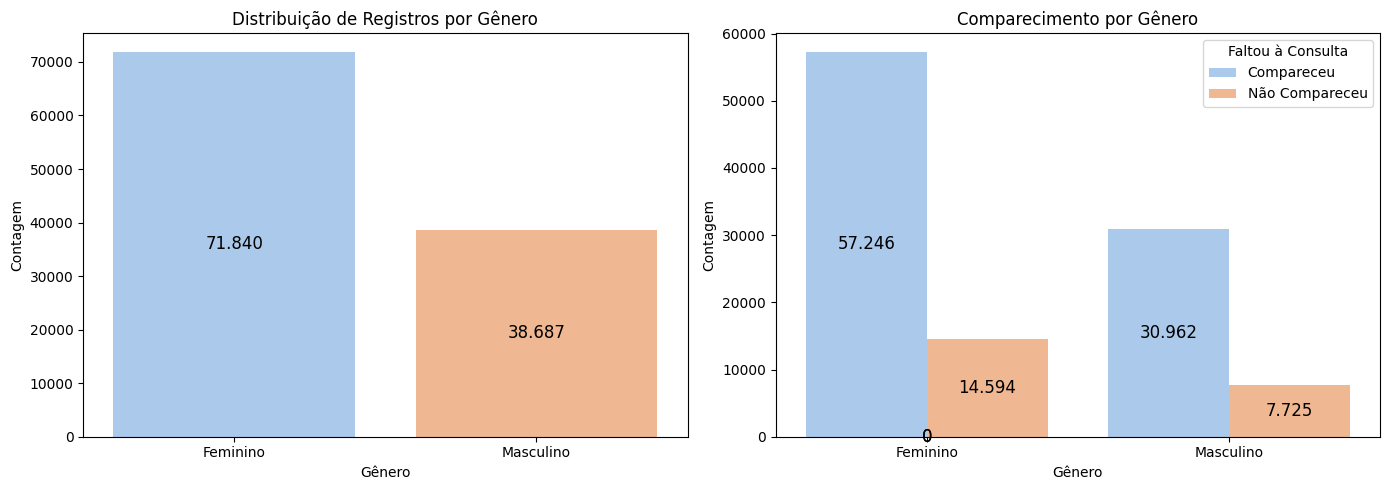

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Gráfico 1: Distribuição de registros por gênero (sem warning)
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Gender', hue='Gender', data=df, palette='pastel', legend=False)
plt.title('Distribuição de Registros por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Feminino', 'Masculino'])

# Adiciona os valores dentro das barras (Gráfico 1)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:,.0f}'.replace(',', '.'),
                 (p.get_x() + p.get_width() / 2, height / 2),
                 ha='center', va='center', fontsize=12, color='black')

# Gráfico 2: Comparecimento por gênero
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Gender', hue='No-show', data=df, palette='pastel')
plt.title('Comparecimento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.legend(title='Faltou à Consulta', labels=['Compareceu', 'Não Compareceu'])

# Adiciona os valores dentro das barras (Gráfico 2)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:,.0f}'.replace(',', '.'),
                 (p.get_x() + p.get_width() / 2, height / 2),
                 ha='center', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

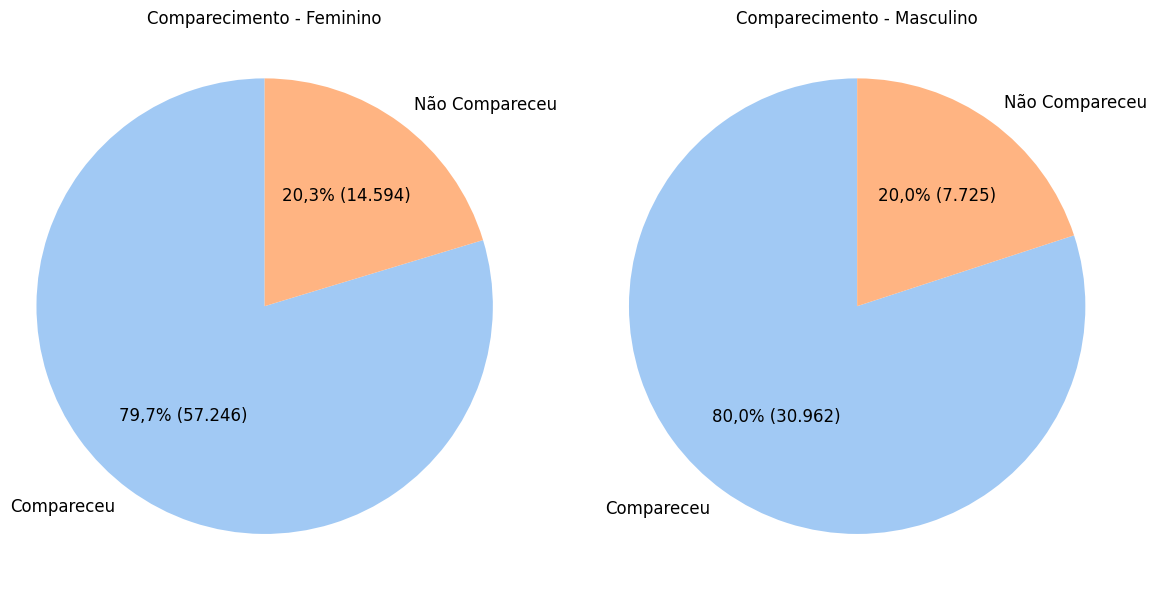

In [8]:
# Filtrando os dados por gênero
df_fem = df[df['Gender'] == 'F']
df_masc = df[df['Gender'] == 'M']

# Contagens de comparecimento por gênero
counts_fem = df_fem['No-show'].value_counts()
counts_masc = df_masc['No-show'].value_counts()

# Labels traduzidos
labels = ['Compareceu', 'Não Compareceu']
colors = sns.color_palette('pastel')[0:2]

# Função para formatar os rótulos
def format_label(pct, total):
    absolute = int(round(pct/100 * total))
    return f'{pct:.1f}'.replace('.', ',') + f'% ({absolute:,.0f})'.replace(',', '.')

# Gráficos de pizza
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gênero feminino
axs[0].pie(counts_fem.values, labels=labels, colors=colors,
           autopct=lambda pct: format_label(pct, counts_fem.sum()),
           startangle=90, textprops={'fontsize': 12})
axs[0].set_title('Comparecimento - Feminino')
axs[0].axis('equal')

# Gênero masculino
axs[1].pie(counts_masc.values, labels=labels, colors=colors,
           autopct=lambda pct: format_label(pct, counts_masc.sum()),
           startangle=90, textprops={'fontsize': 12})
axs[1].set_title('Comparecimento - Masculino')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

🧠 **Insight:** como podemos observar nos gráficos, apesar da amostra apresentar números quantitativos maiores de marcações de consultas para o gênero feminino, o percentual de comparecimentos e não comparecimentos aparenta não ter influência por essa variável isoladamente, ou seja, para ambos os gêneros a proporção de aproximadamente 20% de não comparecimentos e 80% de comparecimentos é mantida.

## Análise da Data da Consulta

O objetivo dessa análise é verificar a distribuição do dataset quanto às datas das consultas (variável `AppointmentDay`).

⚠️ **Obs.:** foi constatado que o intervalo de datas das consultas possui lacunas — ou seja, entre a data mínima e a máxima existem dias em que nenhuma consulta foi marcada. Por isso, foi criado um intervalo contínuo de datas para que o gráfico também mostre esses dias sem agendamentos. Naturalmente, espera-se que a ausência de marcações ocorra principalmente nos finais de semana.

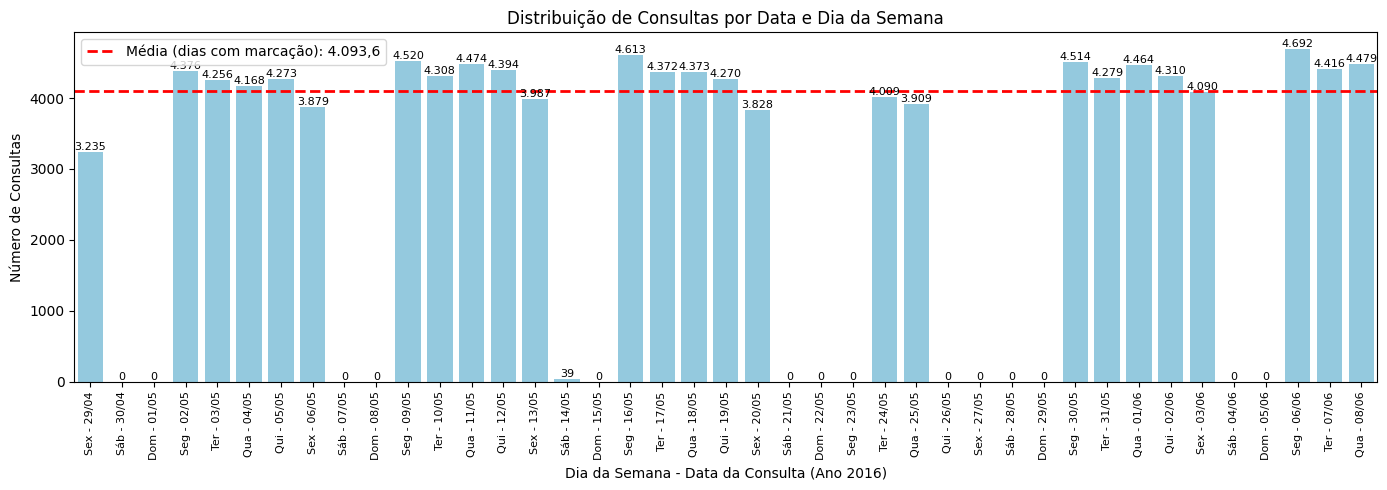

In [9]:
# Define nomes dos dias da semana em português
dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']

# Converte para datetime (se necessário)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Cria série de contagem por dia
contagem_por_dia = df['AppointmentDay'].dt.date.value_counts().sort_index()

# Gera intervalo contínuo de datas
inicio = df['AppointmentDay'].dt.date.min()
fim = df['AppointmentDay'].dt.date.max()
datas_completas = pd.date_range(start=inicio, end=fim).date

# Preenche os dias faltantes com zero
contagem_completa = pd.Series(0, index=datas_completas)
contagem_completa.update(contagem_por_dia)

# Cria os rótulos no formato "DIA - DD/MM"
rotulos_x = [f"{dias_semana[d.weekday()]} - {d.strftime('%d/%m')}" for d in contagem_completa.index]

# Média considerando só os dias com consultas (> 0)
media = contagem_completa[contagem_completa > 0].mean()

# Gráfico
plt.figure(figsize=(14, 5))
ax = sns.barplot(x=contagem_completa.index, y=contagem_completa.values, color='skyblue')

# Linha da média
plt.axhline(media, color='red', linestyle='--', linewidth=2,
            label=f'Média (dias com marcação): {media:,.1f}'.replace(",", "X").replace(".", ",").replace("X", "."))

# Adiciona os valores nas barras
for i, valor in enumerate(contagem_completa.values):
    ax.annotate(f'{valor:,.0f}'.replace(",", "."),
                (i, valor), ha='center', va='bottom', fontsize=8)

# Define todos os rótulos no eixo X
ax.set_xticks(range(len(rotulos_x)))
ax.set_xticklabels(rotulos_x, rotation=90, fontsize=8)

# Configurações finais
plt.title('Distribuição de Consultas por Data e Dia da Semana')
plt.xlabel('Dia da Semana - Data da Consulta (Ano 2016)')
plt.ylabel('Número de Consultas')
plt.legend()
plt.tight_layout()
plt.show()

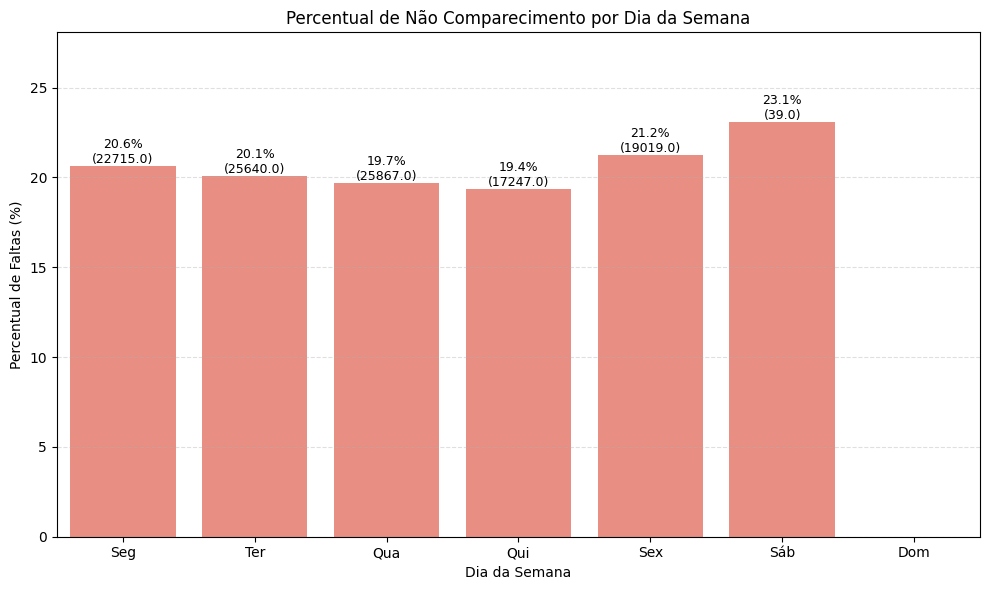

In [10]:
# Garante que a data está no formato datetime
appointment_day = pd.to_datetime(df['AppointmentDay'])

# Extrai o número do dia da semana (0 = segunda, 6 = domingo)
weekday_num = appointment_day.dt.weekday

# Mapeia número para nome abreviado do dia em português
dias_semana = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
weekday_nome = weekday_num.map(dict(zip(range(7), dias_semana)))

# Calcula percentual de faltas por dia da semana sem alterar o df original
faltas_por_dia = (
    df['No-show']
    .groupby(weekday_nome)
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reindex(dias_semana)  # garante a ordem dos dias
)

# Calcula a quantidade total de consultas por dia da semana
total_por_dia = weekday_nome.value_counts().reindex(dias_semana)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=faltas_por_dia.index, y=faltas_por_dia.values, color='salmon')

# Adiciona rótulos nas barras com percentual e total de consultas
for i, (percent, total) in enumerate(zip(faltas_por_dia.values, total_por_dia.values)):
    ax.annotate(f'{percent:.1f}%\n({total})',
                (i, percent), ha='center', va='bottom', fontsize=9)

# Estilo do gráfico
plt.title('Percentual de Não Comparecimento por Dia da Semana')
plt.ylabel('Percentual de Faltas (%)')
plt.xlabel('Dia da Semana')
plt.ylim(0, faltas_por_dia.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


🧠 **Insight:** Aa análise do gráfico de marcações por dia revela algumas percepções relevantes:

 - Fins de semana: Como esperado, geralmente não há marcação de consultas aos sábados e domingos, com exceção de 14/05/2016 (sábado), quando foram registradas 39 marcações — o que pode indicar uma situação atípica ou evento especial;

- Feriado em 26/05/2016 (quinta-feira): Trata-se de Corpus Christi, um feriado nacionalmente reconhecido, e a ausência de marcações nesse dia e na sexta-feira seguinte pode estar relacionada à prática comum de "emendar" feriados no Brasil;

- 23/05/2016 (segunda-feira): Embora não seja feriado em Vitória, esse dia é feriado municipal em Vila Velha, cidade vizinha. Isso pode ter impactado o funcionamento de unidades de saúde com abrangência regional, explicando a ausência de marcações;

- Sextas-feiras: Observa-se um padrão recorrente de menor volume de marcações às sextas em comparação com os outros dias úteis, o que pode refletir preferências operacionais ou dos próprios pacientes;

- Percentual de faltas: De maneira geral, há pouca variação no percentual de não comparecimento entre os dias da semana, indicando que o dia em si não é um fator determinante para a ausência.

## Análise da Distribuição pela Faixa Etária

O objetivo dessa análise é verificar a distribuição do dataset quanto as faixas etárias (variável `Age`).

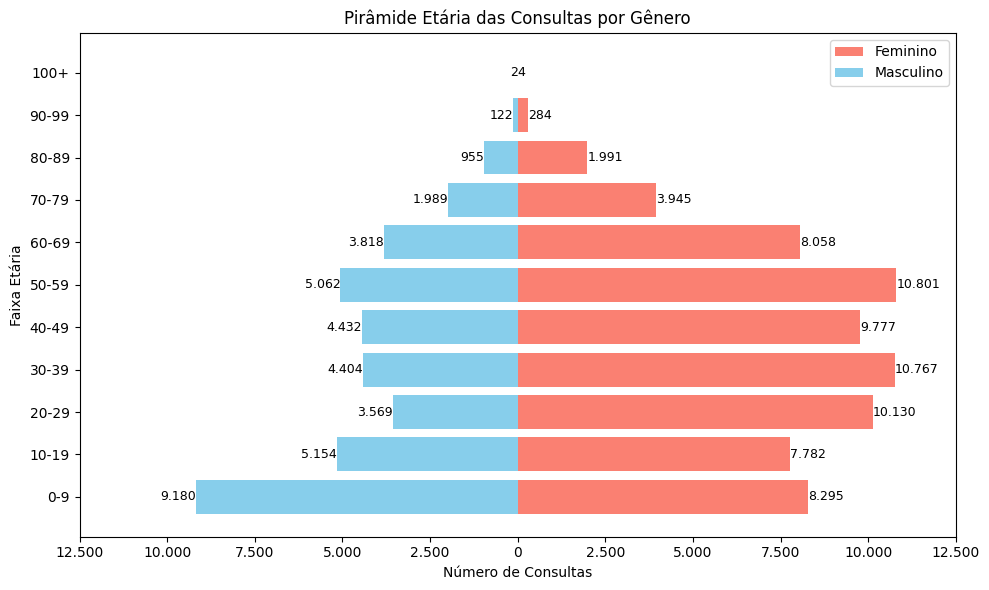

In [11]:
# Define faixas etárias
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, df['Age'].max()]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df['BinAge'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Agrupamento com observed=True
piramide = df.groupby(['BinAge', 'Gender'], observed=True).size().unstack().fillna(0)

# Negativar os homens para o lado esquerdo
piramide['M'] = -piramide['M']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_f = ax.barh(piramide.index, piramide['F'], color='salmon', label='Feminino')
bar_m = ax.barh(piramide.index, piramide['M'], color='skyblue', label='Masculino')

# Rótulos nos homens
for bar in bar_m:
    width = bar.get_width()
    if width != 0:
        ax.annotate(f'{abs(width):,.0f}'.replace(",", "."),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    va='center', ha='right', fontsize=9, color='black')

# Rótulos nas mulheres
for bar in bar_f:
    width = bar.get_width()
    if width != 0:
        ax.annotate(f'{width:,.0f}'.replace(",", "."),
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    va='center', ha='left', fontsize=9, color='black')

# Estilo
ax.set_xlabel('Número de Consultas')
ax.set_ylabel('Faixa Etária')
ax.set_title('Pirâmide Etária das Consultas por Gênero')
ax.legend()

# Formatar o eixo X com separador de milhar
xticks = ax.get_xticks()
ax.set_xticks(xticks)  # Define explicitamente os ticks
ax.set_xticklabels([f'{abs(x):,.0f}'.replace(",", ".") for x in xticks])

plt.tight_layout()
plt.show()

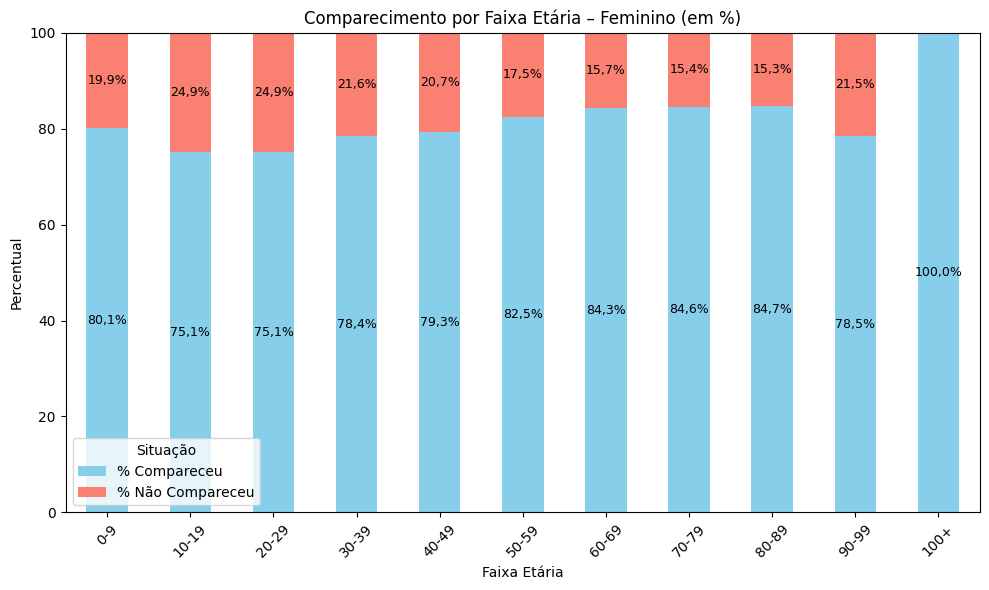

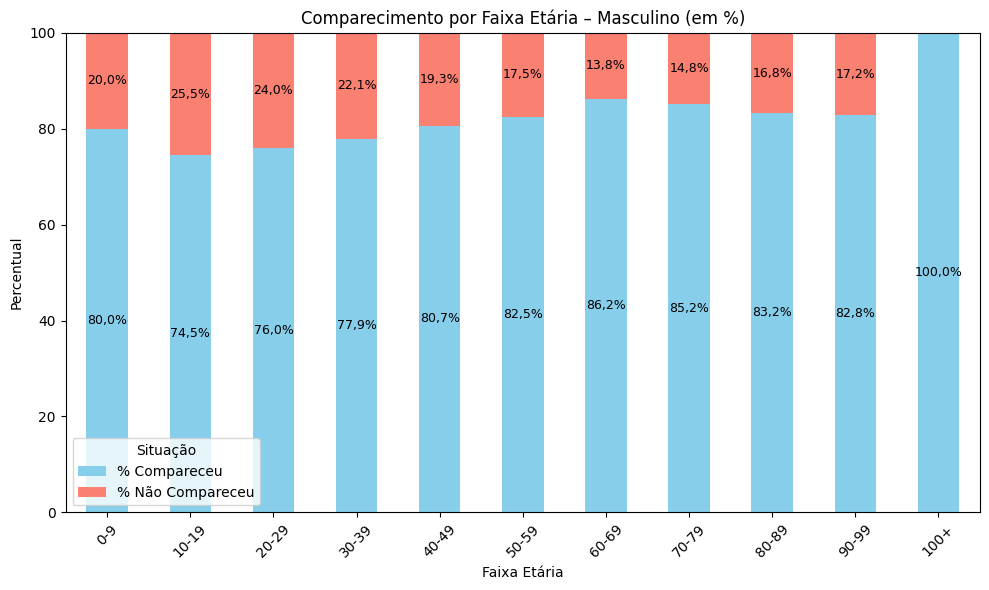

In [12]:

df['BinAge'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Agrupa e calcula as contagens
grupo = df.groupby(['Gender', 'BinAge', 'No-show'], observed=True).size().unstack().fillna(0)
grupo.columns = ['Compareceu', 'Não Compareceu']

# Calcula percentuais
grupo['Total'] = grupo['Compareceu'] + grupo['Não Compareceu']
grupo['% Compareceu'] = (grupo['Compareceu'] / grupo['Total']) * 100
grupo['% Não Compareceu'] = (grupo['Não Compareceu'] / grupo['Total']) * 100

# Plota para cada gênero
for genero in ['F', 'M']:
    genero_nome = 'Feminino' if genero == 'F' else 'Masculino'
    dados = grupo.loc[genero][['% Compareceu', '% Não Compareceu']]

    # Ordena faixas corretamente
    # Garante que só serão incluídas faixas que existem nos dados
    faixas_existentes = dados.index[dados.sum(axis=1) > 0]
    dados = dados.reindex(faixas_existentes)

    # Gráfico de barras empilhadas
    ax = dados.plot(kind='bar', stacked=True, figsize=(10, 6),
                    color=['skyblue', 'salmon'])

    # Rótulos com percentual nas barras
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0:
            ax.annotate(f'{altura:.1f}%'.replace('.', ','),
                        (p.get_x() + p.get_width() / 2, p.get_y() + altura / 2),
                        ha='center', va='center', fontsize=9, color='black')

    # Estilo
    plt.title(f'Comparecimento por Faixa Etária – {genero_nome} (em %)')
    plt.xlabel('Faixa Etária')
    plt.ylabel('Percentual')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.legend(title='Situação')
    plt.tight_layout()
    plt.show()

🧠 **Insights:** a análise dos gráficos por faixa etária revela alguns pontos importantes:

As faixas etárias estão bem distribuídas, refletindo uma representatividade coerente com o que se espera de uma amostra populacional. Não há indícios de distorções ou concentrações atípicas em grupos específicos;

O padrão de comparecimento se manteve semelhante entre os gêneros, sugerindo que o sexo não é um fator isolado relevante para variações significativas de comportamento por idade;

Observa-se uma maior proporção de faltas entre adolescentes (10–19 anos) e jovens adultos (20–29 anos). Esse comportamento pode estar relacionado a fatores como menor comprometimento com a agenda médica, maior mobilidade ou menor percepção da importância das consultas.

## Análise pela Distribuição pelos Bairros

O objetivo dessa análise é verificar se há algum bairro de residência dos pacientes que seja especialmente assíduo ou não assíduo quanto ao comparecimento nas consultas (variável `Neighbourhood`).

Quantidade de bairos: 81


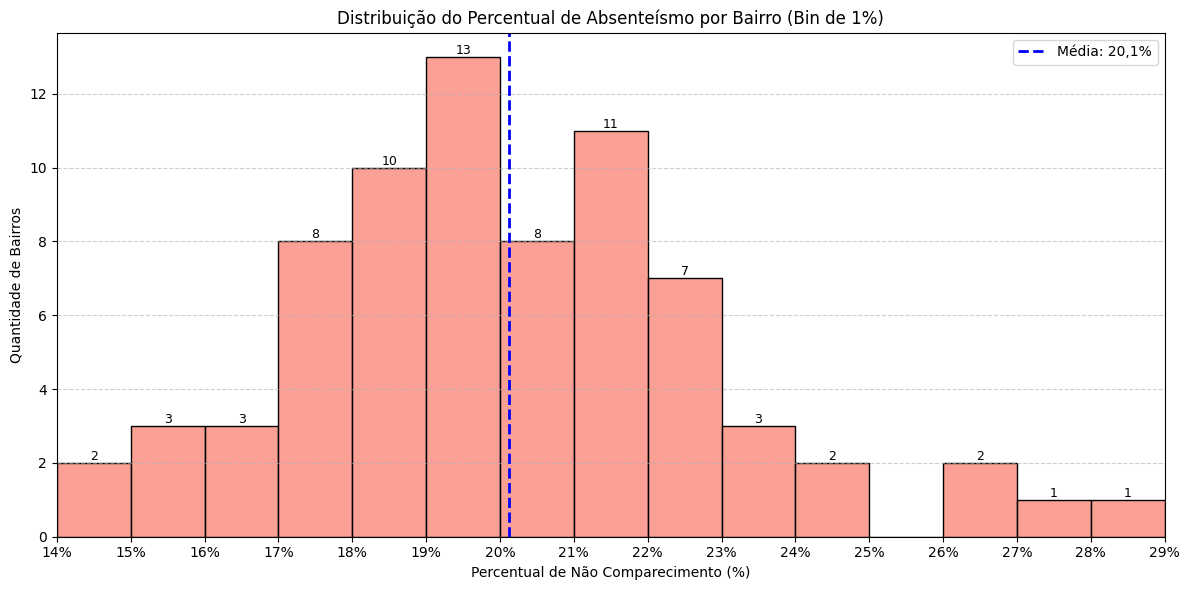

In [13]:
print('Quantidade de bairos:', len(df['Neighbourhood'].unique()))

# Agrupamento e cálculo do percentual de absenteísmo
bairro_data = df.groupby(['Neighbourhood', 'No-show'], observed=True).size().unstack().fillna(0)
bairro_data.columns = ['Compareceu', 'Não Compareceu']
bairro_data['Total'] = bairro_data['Compareceu'] + bairro_data['Não Compareceu']
bairro_data = bairro_data[bairro_data['Total'] > 100].copy()
bairro_data['% Não Compareceu'] = (bairro_data['Não Compareceu'] / bairro_data['Total']) * 100

# Média
media_absenteismo = bairro_data['% Não Compareceu'].mean()

# Limites do eixo X e bins de 1%
x_min = int(np.floor(bairro_data['% Não Compareceu'].min()))
x_max = int(np.ceil(bairro_data['% Não Compareceu'].max()))
bins = np.arange(x_min, x_max + 1, 1)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.histplot(bairro_data['% Não Compareceu'], bins=bins, kde=False, color='salmon', edgecolor='black')

# Linha da média
plt.axvline(media_absenteismo, color='blue', linestyle='--', linewidth=2,
            label=f'Média: {media_absenteismo:.1f}%'.replace('.', ','))

# Adiciona rótulos no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height):,}'.replace(",", "."),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9, color='black')

# Configurações do eixo X
plt.xticks(
    ticks=bins,
    labels=[f'{i}%' for i in bins]
)
plt.xlim(x_min, x_max)

# Estética
plt.title('Distribuição do Percentual de Absenteísmo por Bairro (Bin de 1%)')
plt.xlabel('Percentual de Não Comparecimento (%)')
plt.ylabel('Quantidade de Bairros')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

🧠 **Insights:** o histograma acima agrupa os bairros com base em faixas (*bins*) de percentual de não comparecimento, permitindo visualizar a distribuição desse indicador entre os bairros. O objetivo foi identificar possíveis padrões destoantes ou grupos com altos índices de ausência que se destacassem em relação aos demais.

A análise mostra que, embora exista um pequeno grupo de bairros com percentuais de faltas entre 26% e 29%, esse grupo é separado dos demais por apenas um *bin* vazio (25%) e representa apenas 4 dos 81 bairros analisados. Portanto, não há um ponto de ruptura evidente ou uma concentração atípica expressiva de bairros com comportamento extremamente diferente dos demais. A distribuição, em geral, é relativamente contínua.

## Análise pelo período em dias entre a data da marcação e a data da consulta

O objetivo dessa análise é verificar se há influência da quantidade de dias entre a marcação da consulta e a data da consulta em si. Essa análise pode revelar se um tempo de espera maior entre o agendamento (`ScheduledDay`) e a consulta (`AppointmentDay`) aumenta a chance de não comparecimento.

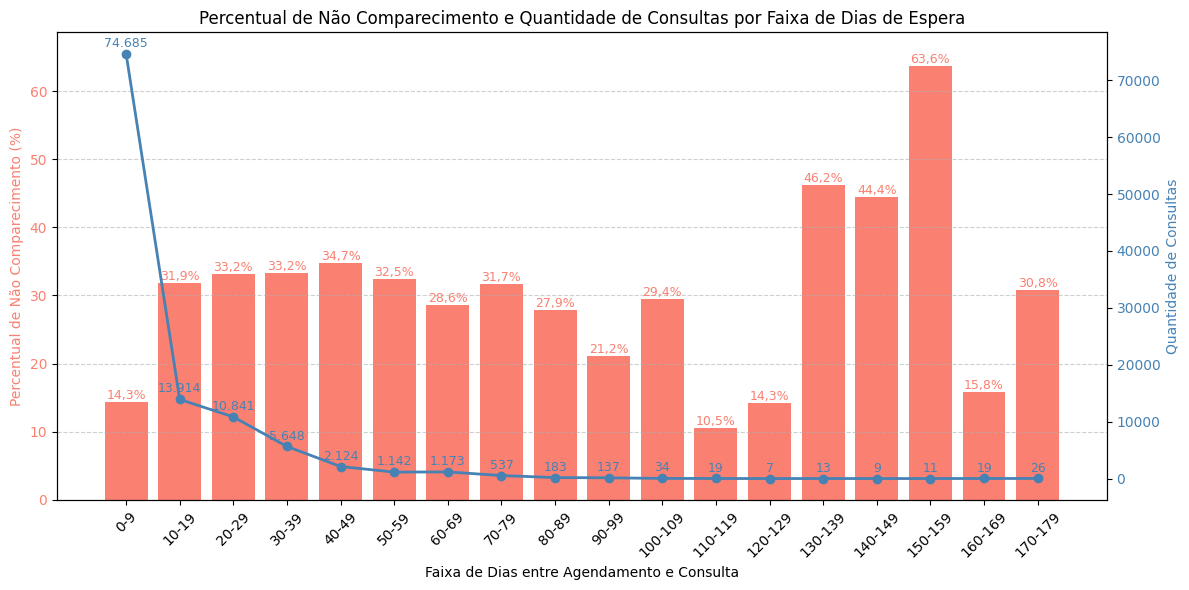

In [14]:
# Converte datas e calcula dias de espera
# Converte e remove a parte da hora (mantém apenas a data)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

# Calcula diferença em dias (já sem considerar horas)
df['WaitDays'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay'])).dt.days


# Criação dos bins de 10 em 10 dias
max_dias = df['WaitDays'].max()
bins = np.arange(0, max_dias + 10, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['BinWaitDays'] = pd.cut(df['WaitDays'], bins=bins, labels=labels, right=False)

# Agrupamento por faixa
agrupado = df.groupby('BinWaitDays', observed=True)['No-show'].value_counts(normalize=True).unstack().fillna(0)
agrupado.columns = ['Compareceu', 'Não Compareceu']
agrupado['% Não Compareceu'] = agrupado['Não Compareceu'] * 100

# Quantidade absoluta por faixa
quantidades = df['BinWaitDays'].value_counts().sort_index()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras: % de não comparecimento
cor_percentual = 'salmon'
ax1.bar(agrupado.index, agrupado['% Não Compareceu'], color=cor_percentual)
ax1.set_ylabel('Percentual de Não Comparecimento (%)', color=cor_percentual)
ax1.set_ylim(0, agrupado['% Não Compareceu'].max() + 5)
ax1.tick_params(axis='y', labelcolor=cor_percentual)


# Rótulos nas barras
for i, v in enumerate(agrupado['% Não Compareceu']):
    ax1.annotate(f'{v:.1f}%'.replace('.', ','),
                 (i, v), ha='center', va='bottom', fontsize=9, color=cor_percentual)

# Eixo secundário: quantidade absoluta de consultas
ax2 = ax1.twinx()
cor_quantidade = 'steelblue'
ax2.plot(quantidades.index, quantidades.values, color=cor_quantidade, marker='o', linewidth=2)
ax2.set_ylabel('Quantidade de Consultas', color=cor_quantidade)
ax2.tick_params(axis='y', labelcolor=cor_quantidade)

# Rótulos nos pontos da linha da quantidade
for i, valor in enumerate(quantidades.values):
    ax2.annotate(f'{valor:,.0f}'.replace(',', '.'),
                 (i, valor), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color=cor_quantidade)

# Título e estilo
plt.title('Percentual de Não Comparecimento e Quantidade de Consultas por Faixa de Dias de Espera')
ax1.set_xlabel('Faixa de Dias entre Agendamento e Consulta')
ax1.grid(axis='y', linestyle='--', alpha=0.6)
ax1.set_xticks(range(len(agrupado.index)))
ax1.set_xticklabels(agrupado.index, rotation=45)
plt.tight_layout()
plt.show()

🧠 **Insights:** é possível observar que a maioria das consultas foi marcada e realizada em um intervalo de até 10 dias, o que pode estar relacionado a atendimentos com características de encaixe ou sem agendamento prévio, como por ordem de chegada.

Outro ponto que chama atenção é o aumento do percentual de faltas na faixa de 130 a 159 dias de espera. Apesar de sugerir um possível impacto do tempo de espera no absenteísmo, essa faixa representa um número bastante pequeno de consultas (apenas 33 no total), o que limita a força dessa evidência.

Cabe destacar ainda que a variável AppointmentDay armazena data e hora. Para o cálculo do tempo de espera entre agendamento e consulta, foi utilizada apenas a parte da data, desconsiderando a hora, a fim de obter um número inteiro de dias.

##Análise das Variáveis Booleanas (Comorbidades e Participação em Programa Social)

O objetivo dessa análise é:
 - Verificar se as comorbidades (hipertensão, diabetes e alcoolismo) tem influência quanto à proporção de não comparecimentos;
 - Verificar se a participação dos pacientes em benefícios sociais (*Scholarship*) tem influência na proporção de não comparecimentos;
 - Verificar se o recebimento de SMS de confirmação da consulta influi na proporção de não comparecimentos.

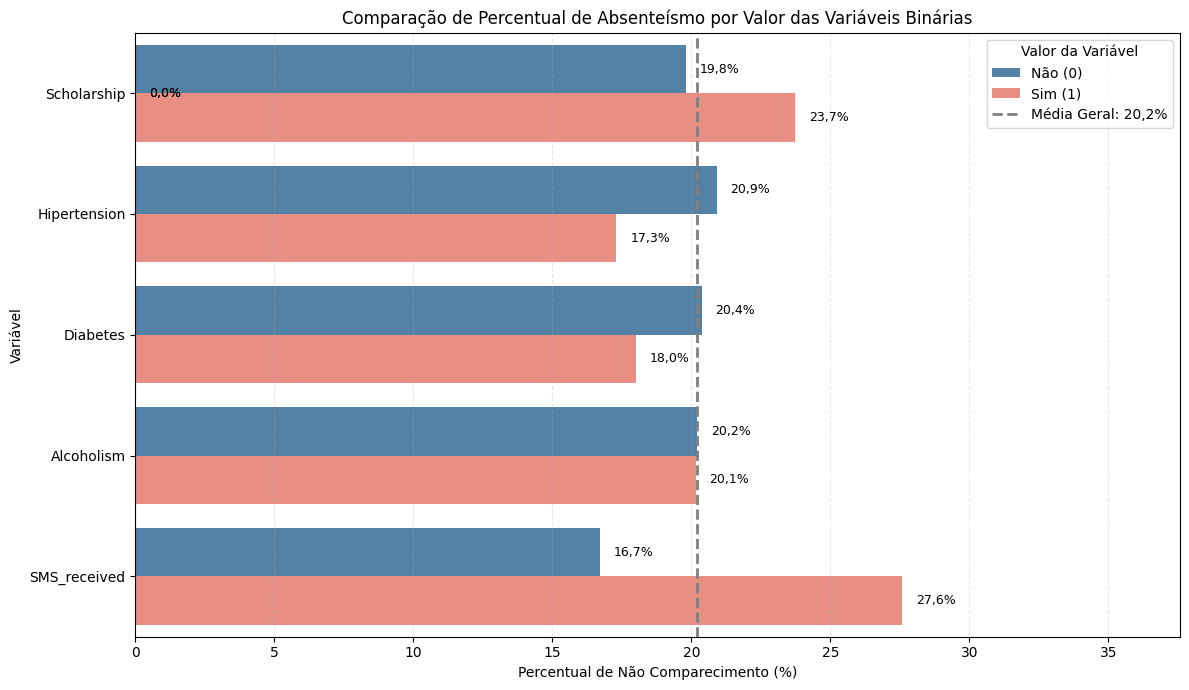

In [15]:
# Variáveis binárias
variaveis_binarias = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']

# Lista para armazenar resultados
dados = []

for var in variaveis_binarias:
    for val in [0, 1]:
        subset = df[df[var] == val]
        if len(subset) == 0:
            continue
        percentual = subset['No-show'].map({'Yes': 1, 'No': 0}).mean() * 100
        dados.append({'Variável': var,
                      'Valor': val,
                      'Percentual Não Comparecimento': percentual})

df_compare = pd.DataFrame(dados)

# Mapeia valores 0 e 1 para texto para legenda
df_compare['Valor'] = df_compare['Valor'].map({0: 'Não (0)', 1: 'Sim (1)'})

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df_compare,
    x='Percentual Não Comparecimento',
    y='Variável',
    hue='Valor',
    palette=['steelblue', 'salmon']
)

# Rótulos nas barras
for p in ax.patches:
    largura = p.get_width()
    ax.annotate(f'{largura:.1f}%'.replace('.', ','),
                (largura + 0.5, p.get_y() + p.get_height() / 2),
                va='center', fontsize=9)

# Linha vertical do absenteísmo geral
percentual_geral = df['No-show'].map({'Yes': 1, 'No': 0}).mean() * 100
plt.axvline(percentual_geral, color='gray', linestyle='--', linewidth=2,
            label=f'Média Geral: {percentual_geral:.1f}%'.replace('.', ','))

# Estilo
plt.title('Comparação de Percentual de Absenteísmo por Valor das Variáveis Binárias')
plt.xlabel('Percentual de Não Comparecimento (%)')
plt.ylabel('Variável')
plt.legend(title='Valor da Variável')
plt.xlim(0, df_compare['Percentual Não Comparecimento'].max() + 10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

🧠 **Insights:** As análises gráficas permitiram levantar as seguintes percepções:

- Pacientes beneficiários de programas sociais (variável *Scholarship*) apresentam maior percentual de não comparecimento às consultas;

- Indivíduos com hipertensão ou diabetes tendem a ser mais assíduos, demonstrando menor taxa de faltas;

- A condição de alcoolismo (*Alcoholism*) não se mostrou associada a uma maior proporção de ausências;

- Curiosamente, pacientes que receberam SMS de lembrete apresentaram um percentual maior de faltas, o que parece contraditório. Esse comportamento pode estar relacionado a outros fatores, como um maior tempo de espera entre o agendamento e a data da consulta — o que merece uma investigação mais aprofundada.

##Análise da Variável *Handcap* (Nível de Deficiência)

O objetivo dessa análise é verificar o nível de deficiência exerce influência no comparecimento às consultas:
 - Verificar se as comorbidades (hipertensão, diabetes e alcoolismo) tem influência quanto à proporção de não comparecimentos;
 - Verificar se a participação dos pacientes em benefícios sociais (*Scholarship*) tem influência na proporção de não comparecimentos;
 - Verificar se o recebimento de SMS de confirmação da consulta influi na proporção de não comparecimentos.

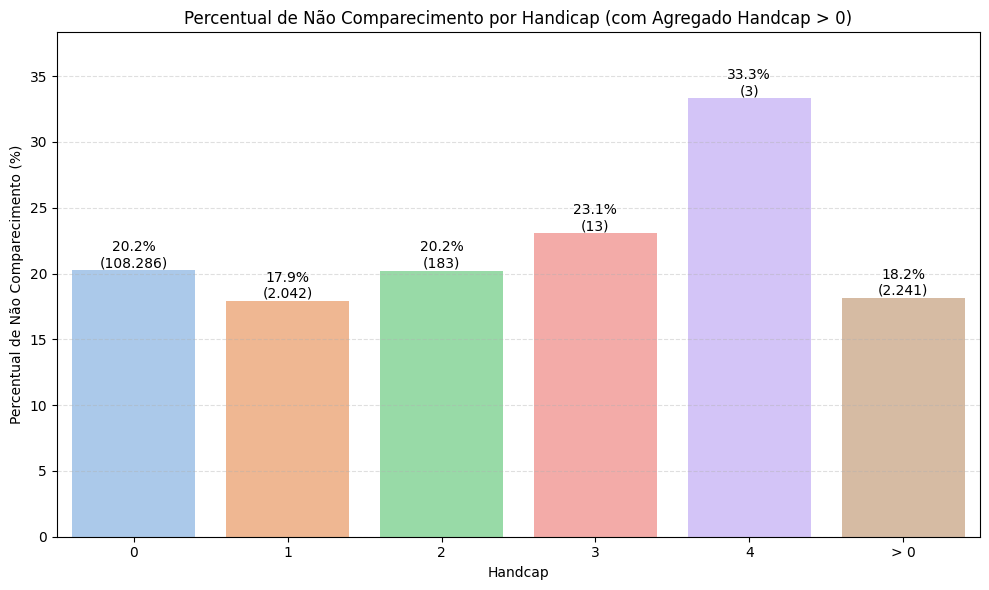

In [16]:
# Agrupamento individual por Handicap
agrupado = df.groupby('Handcap')['No-show'].value_counts(normalize=True).unstack().fillna(0)
agrupado['% Não Compareceu'] = agrupado.get('Yes', 0) * 100
contagem = df['Handcap'].value_counts().sort_index()

# Calcula o grupo agregado Handcap > 0
df_maior_zero = df[df['Handcap'] > 0]
percentual_agregado = df_maior_zero['No-show'].map({'Yes': 1, 'No': 0}).mean() * 100
contagem_agregado = df_maior_zero.shape[0]

# Junta os dados
percentuais = list(agrupado['% Não Compareceu']) + [percentual_agregado]
contagens = list(contagem.values) + [contagem_agregado]
rotulos = list(agrupado.index.astype(str)) + ['> 0']

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=rotulos,
    y=percentuais,
    hue=rotulos,
    dodge=False,
    palette='pastel',
    legend=False
)

# Rótulos nas barras: percentual + contagem
for i, (pct, total) in enumerate(zip(percentuais, contagens)):
    texto = f'{pct:.1f}%\n({total:,})'.replace('.', ',').replace(',', '.')
    ax.annotate(texto,
                (i, pct),
                ha='center', va='bottom', fontsize=10)

# Estilo, títulos e eixos
plt.title('Percentual de Não Comparecimento por Handicap (com Agregado Handcap > 0)')
plt.xlabel('Handcap')
plt.ylabel('Percentual de Não Comparecimento (%)')
plt.ylim(0, max(percentuais) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

🧠 **Insights:** seguem as percepções obtidas com o gráfico acima acima:
 - O conjunto de todas as pessoas que possuem alguma deficiência física (*Handcap* > 0) tem uma proporção de não comparecimento menor que o conjunto de pessoas sem deficiência física (*Handcap* = 0), sendo 18,2% e 20,2% as poporções de não comparecimento respectivamente;
 - Os portadores de deficiências físicas mais severas (*Handcap* 3 e 4) possuem proporções de não comparecimento maiores que os demais, porém são um grupo de pessoas bem pequeno (13 e 3 pessoas, respectivamente).

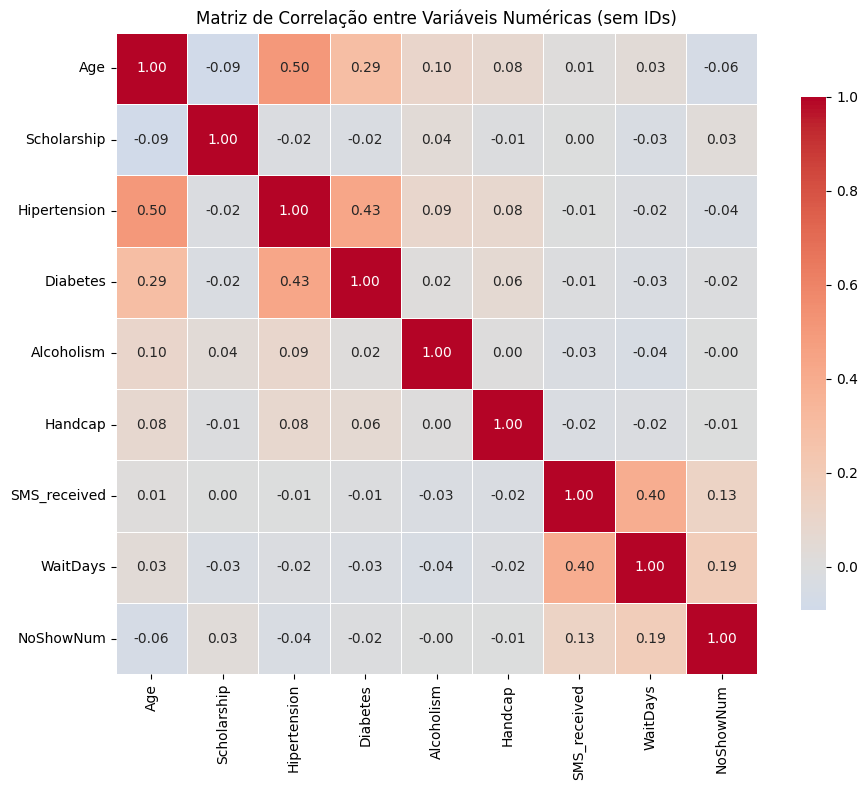

In [17]:
# Cria uma cópia do DataFrame para evitar alterar o original
df_corr = df.copy()

# Converte 'No-show' para valor numérico (1 = faltou, 0 = compareceu)
df_corr['NoShowNum'] = df_corr['No-show'].map({'Yes': 1, 'No': 0})

# Remove colunas de ID
df_corr = df_corr.drop(columns=['PatientId', 'AppointmentID'])

# Seleciona apenas colunas numéricas
df_numerico = df_corr.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
correlacao = df_numerico.corr()

# Gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacao,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Matriz de Correlação entre Variáveis Numéricas (sem IDs)')
plt.tight_layout()
plt.show()

🧠 **Insights:**

✅ Correlações com *No-Show* (variável-alvo):

| Variável         | Correlação | Interpretação                                                                                                                              |
| ---------------- | ---------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| `DiasEspera`     | **0,19**   | Correlação **positiva fraca**: quanto maior o tempo de espera entre agendamento e consulta, **maior a chance de faltar**.                  |
| `SMS_received`   | **0,13**   | Correlação **positiva fraca**: quem recebeu SMS **faltou mais**, o que pode ser contraintuitivo (pode haver outros fatores explicativos).  |
| `Age`            | **-0,06**  | Correlação **negativa muito fraca**: pacientes mais velhos tendem a faltar um pouco menos.                                             |
| Demais variáveis | \~0,00     | Correlações **muito fracas ou inexistentes** com o `No-Show`, o que sugere que isoladamente essas variáveis não explicam bem a ausência. |

🧩 Outras correlações notáveis:

| Par de Variáveis              | Correlação | Interpretação                                                                       |
| ----------------------------- | ---------- | ----------------------------------------------------------------------------------- |
| `Hipertension` × `Age`        | **0.50**   | Correlação **moderada positiva**: pessoas mais velhas têm mais hipertensão.         |
| `Hipertension` × `Diabetes`   | **0.43**   | Também relacionado ao envelhecimento ou comorbidades.                               |
| `SMS_received` × `WaitDays` | **0.40**   | Pessoas que esperaram mais receberam mais SMS (talvez mais tempo = mais lembretes). |

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Transformações Iniciais do Dataset

Essa etapa do pré-processamento visa realizar transformações nas variáveis do dataset, sendo que essas transformações ficam no escopo da linha e, portanto, podem ser realizadas antes da divisão entre os conjuntos de treino e de teste.

### Correção da Idade Negativa

O objetivo dessa etapa é corrigir a linha que apresenta idade negativa, conforme já observado na etapa de análise exploratória.

In [18]:
# Atribuindo o valor 0 para as linhas (na verdade apenas uma) com idades negativas
df.loc[df['Age'] < 0, 'Age'] = 0

### Cáculo do Dia da Semana (*Weekday*)

O objetivo é criar uma coluna de dia da semana a partir da data da consulta. (de 1 - domingo até 7 - sábado)

In [19]:
# Garante que a coluna está no formato datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Cria a coluna com o dia da semana (1 = domingo, ..., 7 = sábado)
df['Weekday'] = df['AppointmentDay'].dt.weekday.apply(lambda x: (x + 1) % 7 + 1)

### Remoção de Colunas Desnecessárias para o Modelo

O objetivo dessa etapa é excluir as colunas que não serão usadas para treinar e utilizar o futuro modelo de *machine learning*. São elas:

- *AppointmentId* e *PacientId*: são colunas identificadoras de consulta e paciente. Não fazem sentido para o modelo;
- *AppointmentDay* e *ScheduledDay*: variáveis de data/hora. A semântica desse tipo de dado está representada pelas colunas calculadas de dias de espera (diferença em dias entre *AppointmentDay* e *ScheduledDay*) e dia da semana (*WeekDay*) calculado a partir da data da consulta (*AppointmentDay*);
- *BinAge* e *BinWaitDays*: colunas de faixas etárias e faixas de dias de espera que foram criadas durante a etapa de análise exploratória de dados.

In [20]:
# Exclusão das colunas
df = df.drop(['AppointmentID', 'PatientId', 'AppointmentDay', 'ScheduledDay', 'BinAge', 'BinWaitDays'], axis=1)

### Tratamento da Coluna de Gênero (*Gender*)

O objetivo é transformar a variável categórica de gênero para numérico (0 - Masculino e 1 - Feminino)

In [21]:

# Mapeia 'M' para 0 e 'F' para 1
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

### Tratamento da Coluna Alvo *No-Show*

O objetivo é transformar a coluna alvo No-show em numérico (0 - Não e 1 - Sim)

In [22]:
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1}).astype(int)

In [23]:
# Separar features (X) e target (y)
X = df.drop('No-show', axis=1)
y = df['No-show']

In [24]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (88421, 11)
Dimensões de X_test: (22106, 11)
Dimensões de y_train: (88421,)
Dimensões de y_test: (22106,)


#One Hot Encoding de NeighboorHood

O objetivo é transformar a variável categórica *Neighbourhood* (texto) em valores numéricos, para que os algoritmos de machine learning consiguem entender e usar.

In [26]:
# Inicializa o encoder (handle_unknown evita erro se um bairro novo surgir no teste)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta nos dados de treino e transforma
X_train_neigh_encoded = encoder.fit_transform(X_train[['Neighbourhood']])

# Transforma os dados de teste usando o mesmo encoder (sem fit novamente!)
X_test_neigh_encoded = encoder.transform(X_test[['Neighbourhood']])

# Recupera os nomes das novas colunas
col_names = encoder.get_feature_names_out(['Neighbourhood'])

# Converte para DataFrame
X_train_neigh_df = pd.DataFrame(X_train_neigh_encoded, columns=col_names, index=X_train.index)
X_test_neigh_df = pd.DataFrame(X_test_neigh_encoded, columns=col_names, index=X_test.index)

# Remove coluna original e junta os dados transformados
X_train_final = pd.concat([X_train.drop(columns=['Neighbourhood']), X_train_neigh_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=['Neighbourhood']), X_test_neigh_df], axis=1)

In [27]:
print("\nPrimeiras 10 linhas 🔍:")
print(tabulate(X_train_final.head(10), headers='keys', tablefmt='plain'))


Primeiras 10 linhas 🔍:
          Gender    Age    Scholarship    Hipertension    Diabetes    Alcoholism    Handcap    SMS_received    WaitDays    Weekday    Neighbourhood_AEROPORTO    Neighbourhood_ANDORINHAS    Neighbourhood_ANTÔNIO HONÓRIO    Neighbourhood_ARIOVALDO FAVALESSA    Neighbourhood_BARRO VERMELHO    Neighbourhood_BELA VISTA    Neighbourhood_BENTO FERREIRA    Neighbourhood_BOA VISTA    Neighbourhood_BONFIM    Neighbourhood_CARATOÍRA    Neighbourhood_CENTRO    Neighbourhood_COMDUSA    Neighbourhood_CONQUISTA    Neighbourhood_CONSOLAÇÃO    Neighbourhood_CRUZAMENTO    Neighbourhood_DA PENHA    Neighbourhood_DE LOURDES    Neighbourhood_DO CABRAL    Neighbourhood_DO MOSCOSO    Neighbourhood_DO QUADRO    Neighbourhood_ENSEADA DO SUÁ    Neighbourhood_ESTRELINHA    Neighbourhood_FONTE GRANDE    Neighbourhood_FORTE SÃO JOÃO    Neighbourhood_FRADINHOS    Neighbourhood_GOIABEIRAS    Neighbourhood_GRANDE VITÓRIA    Neighbourhood_GURIGICA    Neighbourhood_HORTO    Neighbourhood_ILHA DA

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

In [28]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train_final)
X_train_normalized = scaler_norm.transform(X_train_final)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test_final)

In [29]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train_final.columns)

In [30]:
print('Imprimindo as primeiras linhas:')
print(tabulate(df_normalized.head(20), headers='keys', tablefmt='plain'))

Imprimindo as primeiras linhas:
      Gender         Age    Scholarship    Hipertension    Diabetes    Alcoholism    Handcap    SMS_received    WaitDays    Weekday    Neighbourhood_AEROPORTO    Neighbourhood_ANDORINHAS    Neighbourhood_ANTÔNIO HONÓRIO    Neighbourhood_ARIOVALDO FAVALESSA    Neighbourhood_BARRO VERMELHO    Neighbourhood_BELA VISTA    Neighbourhood_BENTO FERREIRA    Neighbourhood_BOA VISTA    Neighbourhood_BONFIM    Neighbourhood_CARATOÍRA    Neighbourhood_CENTRO    Neighbourhood_COMDUSA    Neighbourhood_CONQUISTA    Neighbourhood_CONSOLAÇÃO    Neighbourhood_CRUZAMENTO    Neighbourhood_DA PENHA    Neighbourhood_DE LOURDES    Neighbourhood_DO CABRAL    Neighbourhood_DO MOSCOSO    Neighbourhood_DO QUADRO    Neighbourhood_ENSEADA DO SUÁ    Neighbourhood_ESTRELINHA    Neighbourhood_FONTE GRANDE    Neighbourhood_FORTE SÃO JOÃO    Neighbourhood_FRADINHOS    Neighbourhood_GOIABEIRAS    Neighbourhood_GRANDE VITÓRIA    Neighbourhood_GURIGICA    Neighbourhood_HORTO    Neighbourhoo

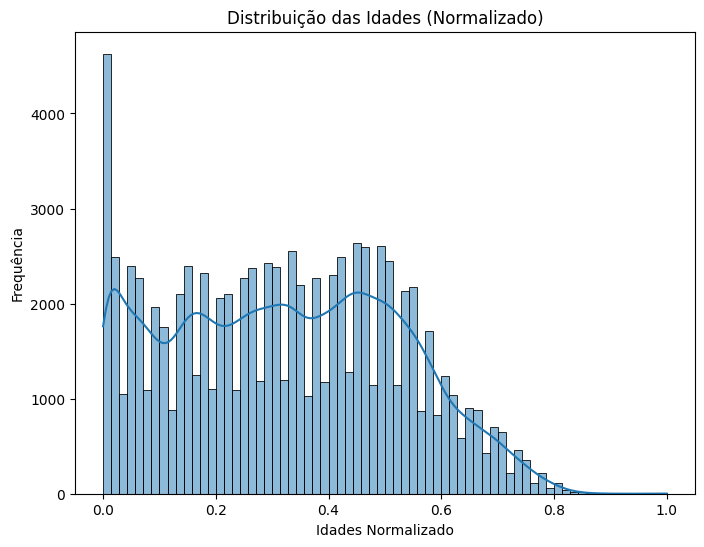

In [31]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Age'], kde=True)
plt.title('Distribuição das Idades (Normalizado)')
plt.xlabel('Idades Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *Age* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Tratamento de Valores Nulos

O dataset original de marcações de consultas não possui valores nulos (faltantes).

In [32]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset de marcação de consultas:")
dfOriginal.isnull().sum()

Valores nulos no dataset de marcação de consultas:


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


# Conclusão

Ao longo deste MVP, exploramos em profundidade o conjunto de dados de agendamentos e faltas em consultas médicas, seguindo as etapas de análise exploratória e pré‑processamento. Abaixo os principais pontos, percepções e aprendizados:

## 1. Caracterização do Dataset

**Dimensões:** dezenas de atributos (incluindo variáveis demográficas, clínicas, de agendamento e geográficas) e milhares de registros (> 100.000);

**Tipos de dados:** misto entre numéricos (idade, dias de espera, binários), categóricos (sexo, bairro) e datetime;

**Valores faltantes:** não foram observados.

## 2. Análise Exploratória (EDA)

**Distribuição de No-show:** cerca de 20 % de ausência, revelada em gráficos de barras, pizza e por gênero/faixa etária;

**Dias de espera:** tendência de aumento de faltas conforme cresce o intervalo entre agendamento e consulta;

**Fatores de risco:** pacientes com comorbidades (hipertensão, diabetes) ou sem SMS de lembrete apresentaram percentuais ligeiramente maiores de absenteísmo, mas correlações individuais foram fracas (< 0,2);

**Correlação:** matriz mostrou alta correlação entre idade e comorbidades, e pouca correlação linear direta com faltas.

## 3. Pré‑processamento

**Tratamento de outliers:** idades negativas zeradas; Handcap agregado; colunas de datetime convertidas em dias de espera e dia da semana;

**Codificação:** variáveis binárias mantidas como 0/1; Gender, No-show e Neighbourhood one‑hot encoded com alinhamento treino‑teste sem data leakage;

**Escalonamento:** MinMaxScaler aplicado somente ao treino e depois ao teste, garantindo reprodutibilidade e evitando vazamento.

## 4. Hipóteses

1. O tempo de espera entre a marcação e a consulta afeta a presença dos pacientes?

**Os resultados indicam que sim para uma faixa específica.**
Quando as consultas são no mesmo dia ou com um intervalo entre dadas menor que 10 dias, a proporção de comparecimento é bem maior que as outras faixas. A faixa intermediária (10–99 dias) o percentual de ausência gira entre ~28% e ~35%, relativamente estável, mas bem mais alto do que nas consultas agendadas para curto prazo. Já nas faixas superiores (acima de 100 dias), apesar de terem poucas consultas, há picos de absenteísmo acima de 40% e até 63,6% na faixa de 150–159 dias.

2. As características médicas dos pacientes, como hipertensão, diabetes ou alcoolismo, têm impacto na chance de comparecimento às consultas?

**Existe uma tendência nesse sentido.**
Pacientes com certas condições clínicas, como hipertensão, diabetes ou limitações físicas, apresentaram leves diferenças no comportamento em relação ao comparecimento, tendendo a um comparecimento maior. Ainda que essas diferenças não sejam grandes quando analisadas individualmente, combinadas com outros fatores, podem ajudar a identificar grupos com maior (ou menor) propensão a faltar.

3. Fatores como idade, gênero e local de moradia afetam a presença dos pacientes nas consultas?

**A análise sugere que sim.**
Pacientes beneficiários de programas sociais e moradores de determinados bairros apresentaram taxas de ausência mais elevadas. Além disso, o cruzamento entre sexo e faixa etária revelou padrões distintos de comparecimento, especialmente entre idosos e jovens adultos.

## Encerramento
De forma geral, não é possível atribuir a ausência dos pacientes a um único fator isolado. As faltas parecem decorrer de uma combinação de elementos operacionais (como forma de agendamento e envio de lembretes), características clínicas e aspectos socioeconômicos. Os insights obtidos ao longo da análise, assim como as etapas de pré-processamento aplicadas, oferecem uma base sólida para o desenvolvimento de modelos preditivos. No entanto, conforme o fluxo típico de projetos de ciência de dados, essas etapas podem — e devem — ser revisitadas e ajustadas ao longo do processo, visando a construção de modelos mais eficazes e robustos.